## Importing Datasets

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pickle

In [3]:
ords_prods_merged = pd.read_pickle(r'/Users/seanward/Desktop/9-29-20 Instacart Basket Analysis/02 Data/Prepared Data/orders_products_customer_merged.pkl')

In [4]:
path = r'/Users/seanward/Desktop/9-29-20 Instacart Basket Analysis'

In [5]:
ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_merged.pkl'))

## Copying days_since_prior_order and order_# to clipboard to put in Excel.

In [6]:
crosstab = pd.crosstab(ords_prods_merged['days_since_prior_order'], ords_prods_merged['order_#'], dropna = False)

In [7]:
crosstab.to_clipboard()

## Question 2: Hiding columns that show first and last name for the sake of PII issues (security)

In [8]:
df = ords_prods_merged

In [9]:
df_2 = df.drop(columns = ['First Name', 'Last_Name'])

In [10]:
df_2.info

<bound method DataFrame.info of           Unnamed: 0_x  order_id  user_id  order_#  orders_day_of_week  \
0                    0   2539329        1        1                   2   
1                    1   2398795        1        2                   3   
2                    2    473747        1        3                   3   
3                    3   2254736        1        4                   4   
4                    4    431534        1        5                   4   
...                ...       ...      ...      ...                 ...   
32434207       1768145    156685   106143       26                   4   
32434208       1101646    484769    66343        1                   6   
32434209       1101647   1561557    66343        2                   1   
32434210       1101648    276317    66343        3                   6   
32434211       1101649   2922475    66343        4                   1   

          order_hour_of_day  days_since_prior_order  product_id  \
0           

## Creating a Region column

In [11]:
# creating the regions column
result11 = []

for value in df_2["State"]:
    
    if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'New Jersey' or value == 'Pennsylvania':
        result11.append('Northeast')
    elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri' :
        result11.append('Midwest')
    elif value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':
        result11.append('South')
    else:
        result11.append('West')

In [12]:
df_2['region_flag'] = result11

## Question 3 Showing difference in spending habits between different regions.  There are far more orders in the South, and then West/Mid-West have less...and Northeast has the very least of them all.

In [13]:
df_2.groupby('region_flag')['spending_flag'].value_counts()

region_flag  spending_flag
Midwest      Low spender       7447710
             High spender       156100
Northeast    Low spender       5620011
             High spender       108336
South        Low spender      10591482
             High spender       210128
West         Low spender       8139676
             High spender       160769
Name: spending_flag, dtype: int64

In [14]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0_x            int64   
 1   order_id                int64   
 2   user_id                 int64   
 3   order_#                 int64   
 4   orders_day_of_week      int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  _merge                  category
 11  Unnamed: 0_y            int64   
 12  product_name            object  
 13  aisle_id                int64   
 14  department_id           int64   
 15  prices                  float64 
 16  price_range_loc         object  
 17  busiest_day             object  
 18  busiest_days            object  
 19  busiest_period_of_day   object  
 20  max_order               int64   
 21  loyalt

## Question 4 Exclusion flag for low activity customers

In [15]:
df_2.groupby('user_id').agg({'user_id' : ['count']})

,user_id
,count
user_id,
1,59
2,195
3,88
4,18
5,37
...,...
206205,32
206206,285


In [16]:
df_2.shape

(32434212, 33)

In [17]:
df_active_cust =  df_2[df_2['max_order'] > 5]

In [18]:
df_active_cust.shape

(30198831, 33)

## Exporting active customer pickle file

In [19]:
df_active_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_cust.pkl'))

## Question 5 Profiling variable based on age and number of dependants

In [20]:
result1 = []

for value in df_2["Age"]:
  if value < 21:
    result1.append ("Child")
  elif value > 20 and value < 40:
    result1.append ("Young adult")
  elif value > 40 and value < 60:
    result1.append ("Middle age adult")
  elif value > 59:
    result1.append ("Elderly adult")
  else: 
    result1.append ("Other")

In [21]:
df_2['age_range'] = result1

In [22]:
result1

['Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Young adult',
 'Elderly adult',
 'Elderly adult',
 'Elderly adult',
 '

In [23]:
df_2.loc[(df_2['#_dependants'] > 0) & (df_2['age_range'] == 'Young adult'), 'customer_profile'] = 'Young parent'

In [24]:
df_2.loc[(df_2['#_dependants'] == 0) & (df_2['age_range'] == 'Young adult'), 'customer_profile'] = 'Young with no kids'

In [25]:
df_2.loc[(df_2['#_dependants'] > 0) & (df_2['age_range'] == 'Middle age adult'), 'customer_profile'] = 'Middle aged parent'

In [26]:
df_2.loc[(df_2['#_dependants'] == 0) & (df_2['age_range'] == 'Middle age adult'), 'customer_profile'] = 'Middle aged with no kids'

In [27]:
df_2.loc[(df_2['#_dependants'] > 0) & (df_2['age_range'] == 'Elderly adult'), 'customer_profile'] = 'Elderly parent'

In [28]:
df_2.loc[(df_2['#_dependants'] == 0) & (df_2['age_range'] == 'Elderly adult'), 'customer_profile'] = 'Elderly with no kids'

In [29]:
df_2.loc[(df_2['age_range'] == 'Child'), 'customer_profile'] = 'Child'

In [30]:
df_2['customer_profile'] = df_2['customer_profile'].fillna('Other')

In [31]:
df_2['customer_profile'].value_counts(dropna = False)

Elderly parent              8302722
Middle aged parent          7254966
Young parent                7227634
Elderly with no kids        2774428
Young with no kids          2422159
Middle aged with no kids    2421580
Child                       1524364
Other                        506359
Name: customer_profile, dtype: int64

In [37]:
df_2['age_range'].value_counts(dropna = False)

Elderly adult       11077150
Middle age adult     9676546
Young adult          9649793
Child                1524364
Other                 506359
Name: age_range, dtype: int64

## Question 6 Visualization for the profiles

## Showing the average amount spent each day of the week for each customer profile

In [40]:
sns.set(rc={'figure.figsize':(16,10)})

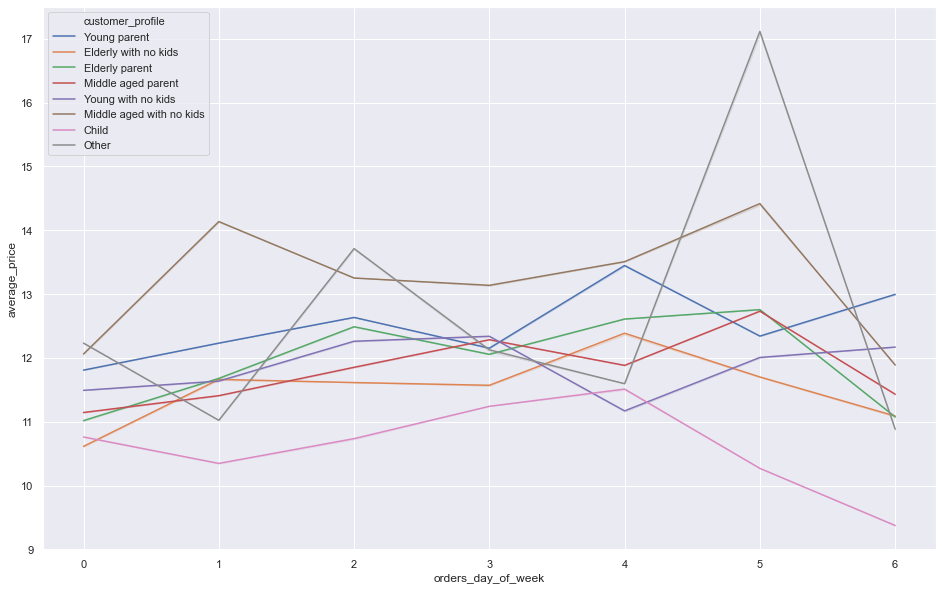

In [41]:
ax = sns.lineplot(x = 'orders_day_of_week', y = 'average_price', hue = 'customer_profile', data = df_2, ci = False)

## Showing the average spent for each customer profile

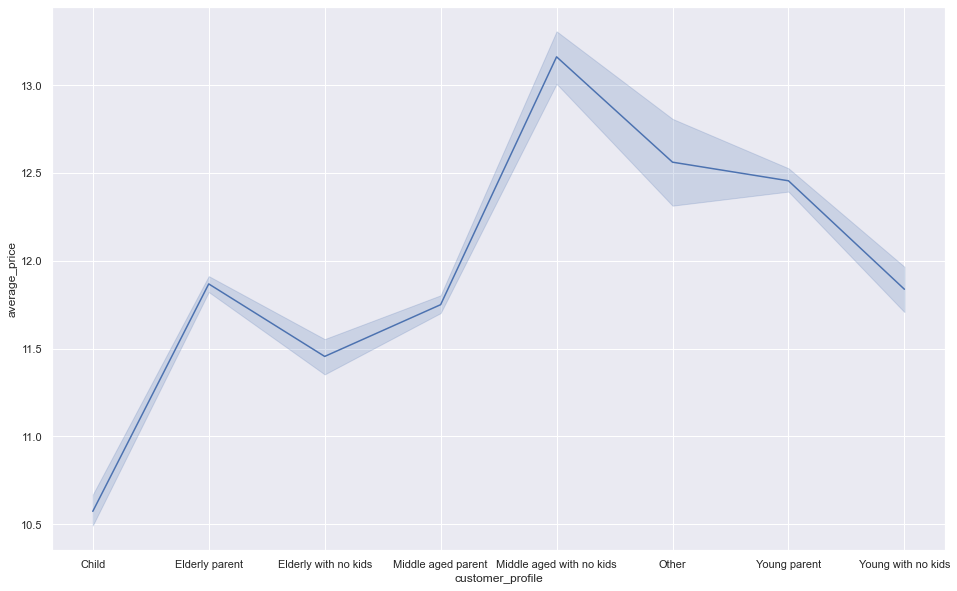

In [42]:
line = sns.lineplot(data = df_2, x = 'customer_profile', y = 'average_price')

## Showing the average spent for each region

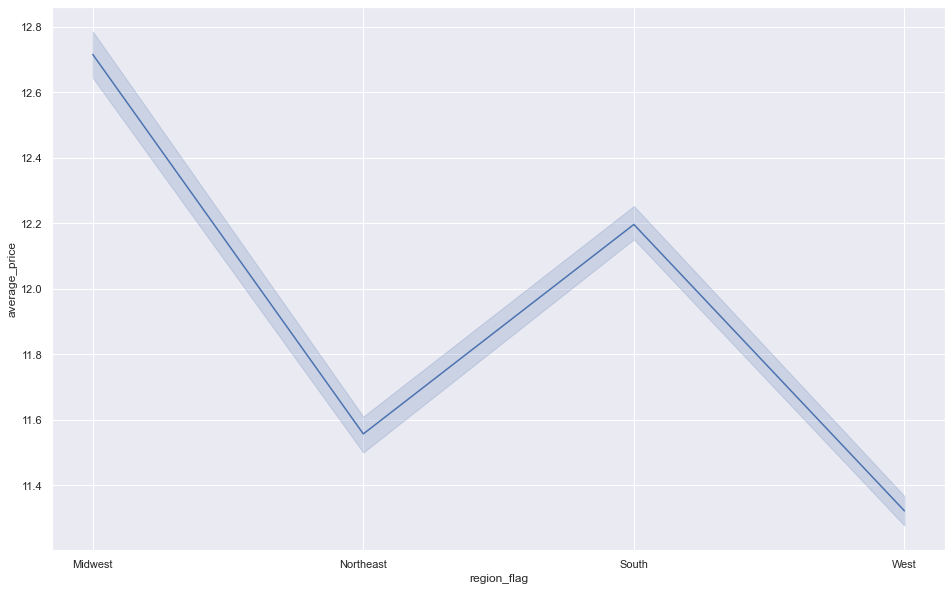

In [43]:
line = sns.lineplot(data = df_2, x = 'region_flag', y = 'average_price')

## Showing the income of each customer profile

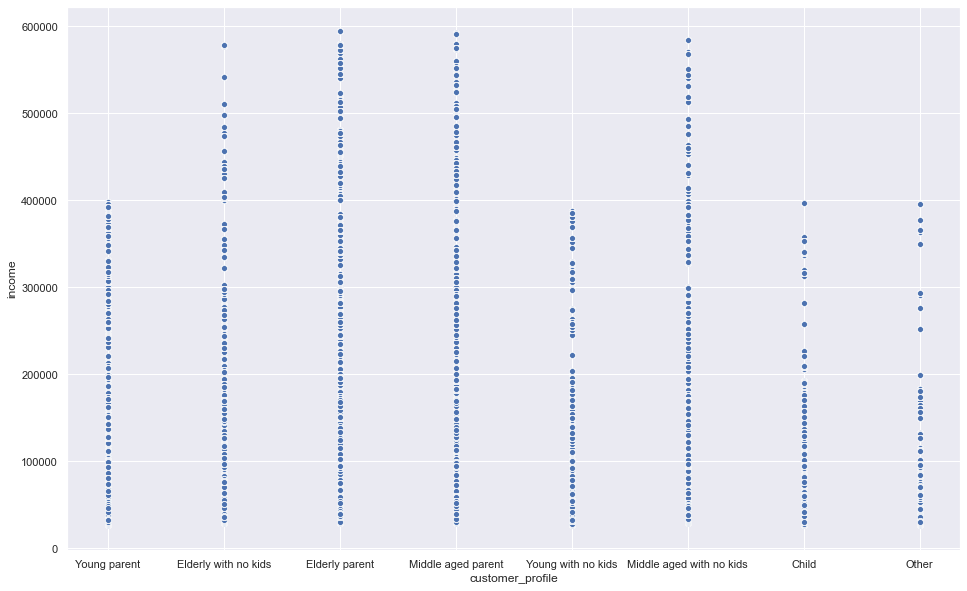

In [44]:
sns.scatterplot(x = 'customer_profile', y = 'income',data = df_2)

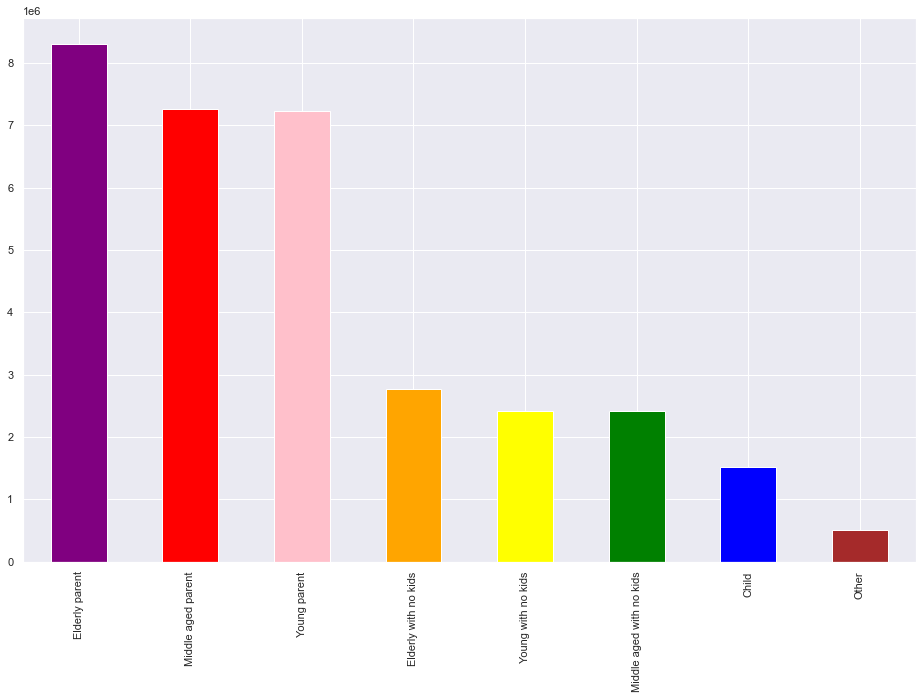

In [45]:
bar = df_2['customer_profile'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue', 'brown'])

## Question 7 Max, min and mean for customer profile spending

In [46]:
cust_by_income = df_2.groupby('customer_profile', sort = False).agg({'income': ['mean', 'min', 'max']})

In [47]:
cust_by_income

income               
                                   mean    min     max
customer_profile                                      
Young parent               70526.074620  25911  397929
Elderly with no kids      115651.493887  29005  578251
Elderly parent            115694.063490  29001  593901
Middle aged parent        115492.200150  29018  592409
Young with no kids         70469.898861  25903  387860
Middle aged with no kids  116541.808736  29017  584097
Child                      70335.341634  25972  396364
Other                      70921.138645  26154  395360

In [48]:
cust_by_spending = df_2.groupby('customer_profile', sort = False).agg({'prices': ['mean', 'min', 'max']})

In [49]:
cust_by_spending

prices              
                               mean  min      max
customer_profile                                 
Young parent              12.454775  1.0  99999.0
Elderly with no kids      11.455219  1.0  99999.0
Elderly parent            11.867875  1.0  99999.0
Middle aged parent        11.749747  1.0  99999.0
Young with no kids        11.837498  1.0  99999.0
Middle aged with no kids  13.160250  1.0  99999.0
Child                     10.573552  1.0  99999.0
Other                     12.560661  1.0  99999.0

In [50]:
cust_by_freq = df_2.groupby('customer_profile', sort = False).agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [51]:
cust_by_freq

days_since_prior_order           
                                           mean  min   max
customer_profile                                          
Young parent                          11.086200  0.0  30.0
Elderly with no kids                  11.047967  0.0  30.0
Elderly parent                        11.107867  0.0  30.0
Middle aged parent                    11.148965  0.0  30.0
Young with no kids                    11.136952  0.0  30.0
Middle aged with no kids              10.994846  0.0  30.0
Child                                 11.165224  0.0  30.0
Other                                 11.148282  0.0  30.0

## Question 8 Comparing customer profiles with regions and departments

In [52]:
df_2.groupby('department_id').agg({'region_flag' : ['count']})

,region_flag
,count
department_id,
1,2236432
2,36291
3,1176787
4,9479291
5,153743
6,269253
7,2688159
8,97724


In [53]:
df_2.groupby(['region_flag', 'customer_profile', 'department_id']).agg({'department_id' : ['count']})

department_id
                                                     count
region_flag customer_profile   department_id              
Midwest     Child              1                     24861
                               2                       482
                               3                     12577
                               4                    102618
                               5                      2514
...                                                    ...
West        Young with no kids 17                    14097
                               18                     8603
                               19                    53229
                               20                    19497
                               21                     1252

[672 rows x 1 columns]

In [54]:
df_4 = df_2.groupby(['region_flag', 'customer_profile', 'department_id']).agg({'department_id' : ['count']})

In [55]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 672 entries, ('Midwest', 'Child', 1) to ('West', 'Young with no kids', 21)
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   (department_id, count)  672 non-null    int64
dtypes: int64(1)
memory usage: 7.8+ KB


In [56]:
df_4.shape

(672, 1)

In [57]:
df_4.describe

<bound method NDFrame.describe of                                              department_id
                                                     count
region_flag customer_profile   department_id              
Midwest     Child              1                     24861
                               2                       482
                               3                     12577
                               4                    102618
                               5                      2514
...                                                    ...
West        Young with no kids 17                    14097
                               18                     8603
                               19                    53229
                               20                    19497
                               21                     1252

[672 rows x 1 columns]>

PART 2

## Importing Departments data

In [58]:
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [59]:
dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [60]:
dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21 non-null     int64 
 1   department  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [61]:
dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## Renaming department column to make sense

In [62]:
dept.rename(columns = {"Unnamed: 0" : "department_id"}, inplace = True)

In [63]:
dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [64]:
df_3 = df_2.merge(dept, on = ['department_id'])

In [65]:
dept_order = df_3.groupby('department').agg({'order_id': ['count']})

## Exporting and importing altered Departments dataset

In [66]:
dept_order.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'dept_order.csv'))

In [67]:
dept_order_1 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'dept_order.csv'), index_col = False)

In [68]:
dept_order_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  22 non-null     object
 1   order_id    22 non-null     object
dtypes: object(2)
memory usage: 496.0+ bytes


In [69]:
dept_order_1.rename(columns = {"Unnamed: 0" : "department"}, inplace = True)

In [70]:
dept_order_1.rename(columns = {"order_id" : "number_of_orders"}, inplace = True)

In [71]:
dept_order_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   department        22 non-null     object
 1   number_of_orders  22 non-null     object
dtypes: object(2)
memory usage: 496.0+ bytes


In [72]:
dept_order_1.isnull().sum()

department          1
number_of_orders    1
dtype: int64

In [73]:
dept_order_1_clean = dept_order_1[dept_order_1['number_of_orders'].isnull() == False]

In [74]:
dept_order_1_clean.shape

(22, 2)

In [75]:
dept_order_1_clean.head

<bound method NDFrame.head of          department number_of_orders
0               NaN            count
2           alcohol           153743
3            babies           423802
4            bakery          1176787
5         beverages          2688159
6         breakfast           710647
7              bulk            34573
8      canned goods          1068058
9        dairy eggs          5414016
10             deli          1051249
11  dry goods pasta           866627
12           frozen          2236432
13        household           738666
14    international           269253
15     meat seafood           708931
16          missing            69145
17            other            36291
18           pantry          1875577
19    personal care           447691
20             pets            97724
21          produce          9479291
22           snacks          2887550>

In [76]:
dept_order_1.shape

(23, 2)

## Creating a barplot for departments and number of orders

Text(0, 0.5, 'Department')

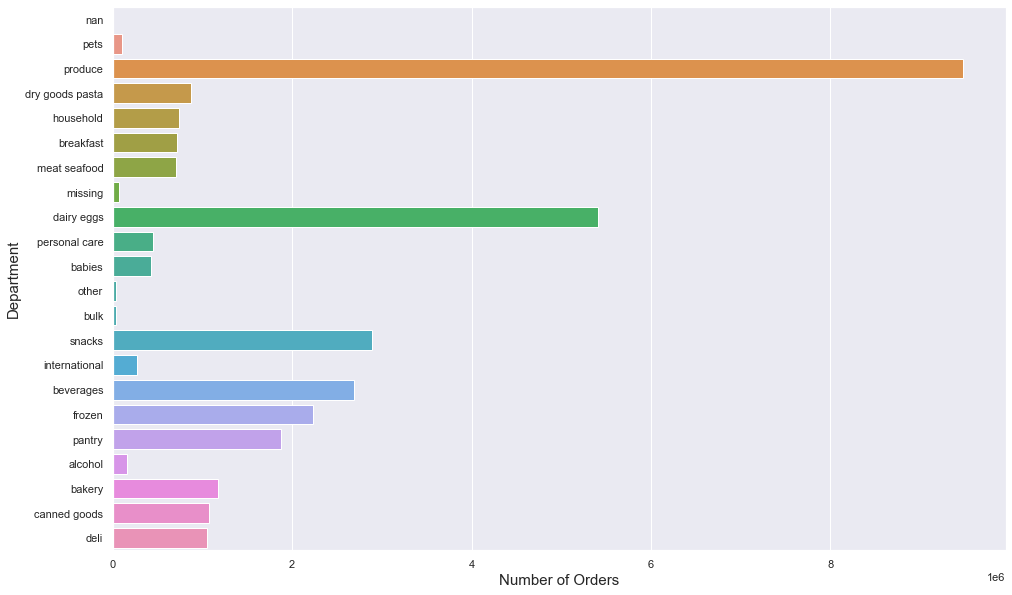

In [77]:
gx = sns.barplot(x = 'number_of_orders', y = 'department', orient = 'h', data = dept_order_1_clean, order = dept_order_1_clean.sort_values('number_of_orders', ascending = False).department)
plt.xlabel("Number of Orders", size=15)
plt.ylabel("Department", size=15)


## Creating a barplot for customer profiles and prices by region

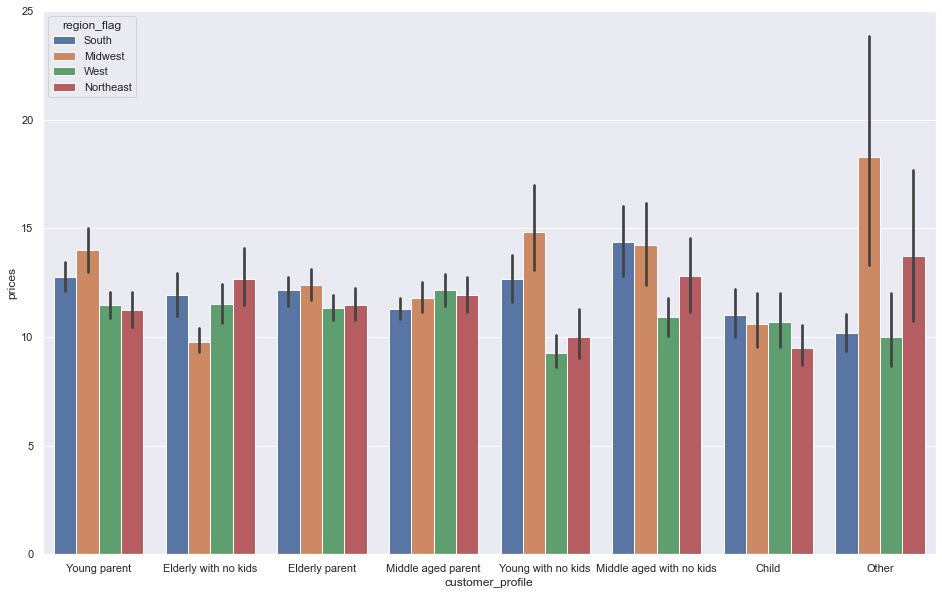

In [78]:
cx = sns.barplot(x = 'customer_profile', y = 'prices', hue = 'region_flag', data = df_2)

## Creating df_merged data set for departments

In [83]:
df_merged = ords_prods_merged.merge(dept, on = ['department_id'])

In [85]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0_x            int64   
 1   order_id                int64   
 2   user_id                 int64   
 3   order_#                 int64   
 4   orders_day_of_week      int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  _merge                  category
 11  Unnamed: 0_y            int64   
 12  product_name            object  
 13  aisle_id                int64   
 14  department_id           int64   
 15  prices                  float64 
 16  price_range_loc         object  
 17  busiest_day             object  
 18  busiest_days            object  
 19  busiest_period_of_day   object  
 20  max_order               int64   
 21  loyalt

In [86]:
dept_order = df_merged.groupby('department').agg({'order_#': ['count']})

In [87]:
dept_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, alcohol to snacks
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   (order_#, count)  21 non-null     int64
dtypes: int64(1)
memory usage: 336.0+ bytes


## Creating scatterplot for average price and loyalty flag

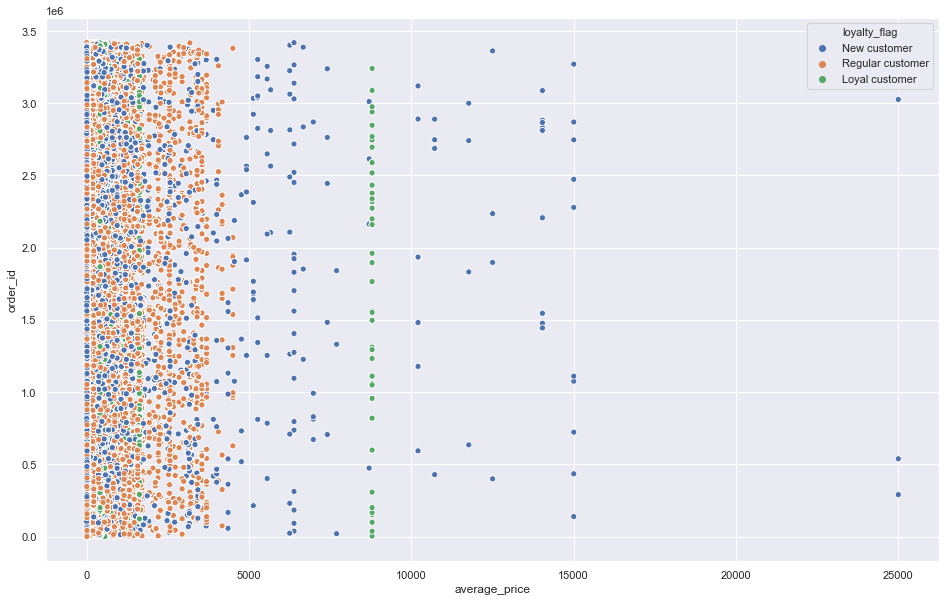

In [90]:
sns.scatterplot(x = 'average_price', y = 'order_id', hue = 'loyalty_flag', data = df_2)

## Re-creating price_range_loc since I made a mistake back in 4-7

In [91]:
result1 = []

for value in df_2["prices"]:
  if value > 15:
    result1.append("High-range product")
  elif value <= 15 and value > 5:
    result1.append("Mid-range product")
  else:
    result1.append("Low-range product")

In [92]:
df_2['price_range_loc'] = result1

## Creating bar chart with loyalty flags

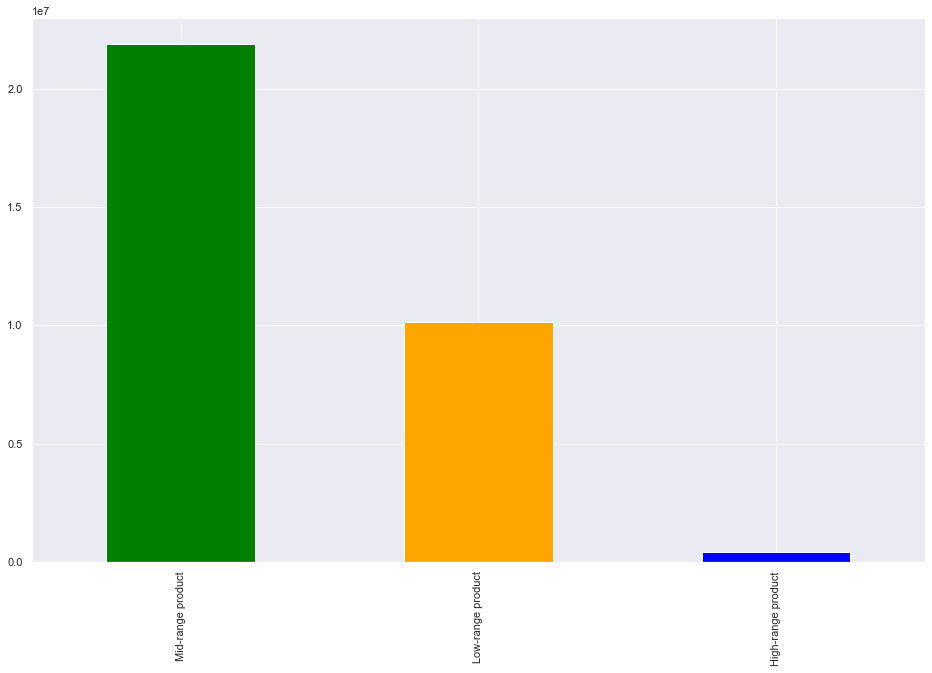

In [93]:
bar = df_2['price_range_loc'].value_counts().plot.bar(color =['green', 'orange', 'blue'])

## Creating brand_loyalty to show each frequency of customer orders

In [95]:
brand_loyalty = df_2.groupby('loyalty_flag', sort = False).agg({'median_days_since': ['mean', 'min', 'max']})

In [96]:
brand_loyalty

median_days_since           
                              mean  min   max
loyalty_flag                                 
New customer             18.459849  0.0  30.0
Regular customer         10.613335  0.0  30.0
Loyal customer            5.170978  0.0  14.0

In [102]:
df_2.groupby('region_flag', sort = False).agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
region_flag                                  
South                    11.108240  0.0  30.0
Midwest                  11.181993  0.0  30.0
West                     11.047007  0.0  30.0
Northeast                11.076055  0.0  30.0

## Creating barplot for family status and the departments

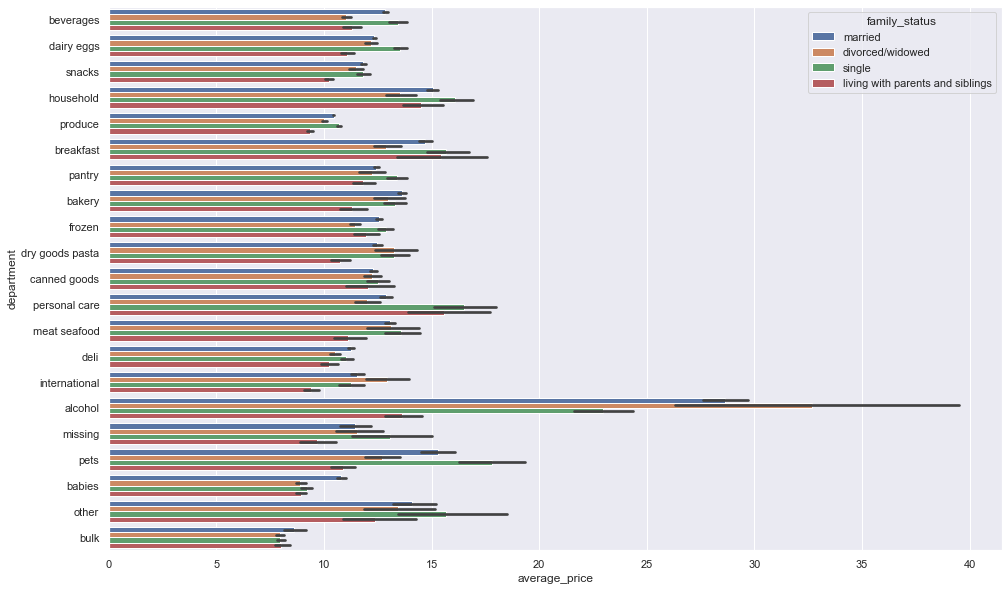

In [107]:
cx = sns.barplot(x = 'average_price', y = 'department', hue = 'family_status', data = df_merged)